In [1]:
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

plt.rcParams['figure.figsize'] = [20,3]

In [2]:
# # IMPORTING TIFF FILE - FROM SERVER (CAN SKIP OUT ONCE SAVED ONTO PICKLE FILES)
# tiff_path = "/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/2020-07-17_HF098_003_first33pct.tif"
# stack = tf.imread(tiff_path); stack = stack[16000:]
#
# # setting ROI locations
# width = 200 # dimensions = pixels
# height = width
# stack_roi_1 = stack[:, 623:623+width, 577:577+height]
# stack_roi_2 = stack[:, 636:636+width, 384:384+height]
# stack_roi_3 = stack[:, 400:400+width, 393:393+height]
# stack_roi_4 = stack[:, 378:378+width, 554:554+height]


In [10]:
# # SAVING ROI TRACES AS PICKLE FILES - CAN SKIP OUT UNLESS NEEDED
# pkl.dump(stack_roi_1, open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_1-2020-07-17_HF098_003_first33pct.pkl', 'wb'))
# pkl.dump(stack_roi_2, open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_2-2020-07-17_HF098_003_first33pct.pkl', 'wb'))
# pkl.dump(stack_roi_3, open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_3-2020-07-17_HF098_003_first33pc.pkl', 'wb'))
# pkl.dump(stack_roi_4, open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_4-2020-07-17_HF098_003_first33pct.pkl', 'wb'))


In [ ]:
# IMPORTING ROI TRACES FROM PICKLE FILES - MAKE SURE TO POINT PATH TO APPROPRIATE DIRECTORY
stack_roi_1 = pkl.load(open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_1-2020-07-17_HF098_003_first33pct.pkl', 'rb'))
stack_roi_2 = pkl.load(open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_2-2020-07-17_HF098_003_first33pct.pkl', 'rb'))
stack_roi_3 = pkl.load(open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_3-2020-07-17_HF098_003_first33pct.pkl', 'rb'))
stack_roi_4 = pkl.load(open('/home/pshah/mnt/qnap/Analysis/2020-07-17/HF98/003/roi_4-2020-07-17_HF098_003_first33pct.pkl', 'rb'))


Text(0.5, 0.98, 'ROI 3')

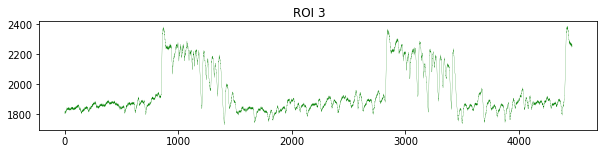

In [7]:
# PLOT ROI's AVG Ca TRACE

# select one ROI and plot
plt.figure(figsize=[10,2])
title = 'ROI 3'
ca_avg_ = np.mean(stack_roi_3, axis=2)
ca_avg = np.mean(ca_avg_, axis=1)

plt.plot(ca_avg, linewidth=0.2, c='green')
plt.suptitle(title)
plt.show()


# select the second comparison ROI for cross-correlation analysis; plot the Ca trace
ca_avg_ = np.mean(stack_roi_2, axis=2)
ca_avg_2 = np.mean(ca_avg_, axis=1)
title = 'ROI2'
plt.figure(figsize=[10,2])
plt.plot(ca_avg_2, linewidth=0.2, c='green')
plt.suptitle(title)
plt.show()



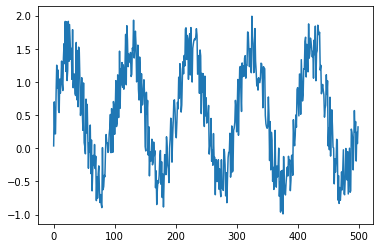

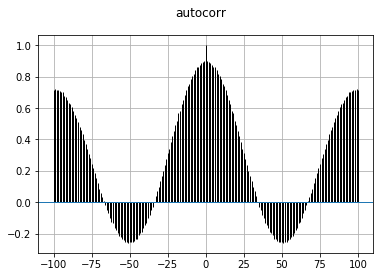

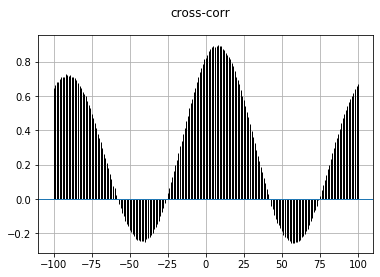

In [2]:
# TEST OF THE SIMPLE AUTO-CORRELATION AND CROSS-CORRELATION CODE ON A SIMULATED NOISY SINE WAVE

def genSine(f0, fs, phase, dur):
    t = np.arange(dur)
    sinusoid = np.sin(2*np.pi*t*(f0/fs) - phase) + np.random.rand(len(t))
    return sinusoid

x = genSine(10,1000, 0, 500)
x2 = genSine(10,1000, 100, 500)
plt.plot(x);plt.show()


plt.acorr(x, usevlines=True, normed=True, maxlags=100, lw=1)
plt.grid(True)
plt.suptitle('autocorr')
plt.show()

plt.xcorr(x, x2, usevlines=True, normed=True, maxlags=100, lw=1)
plt.grid(True)
plt.suptitle('cross-corr')
plt.show()


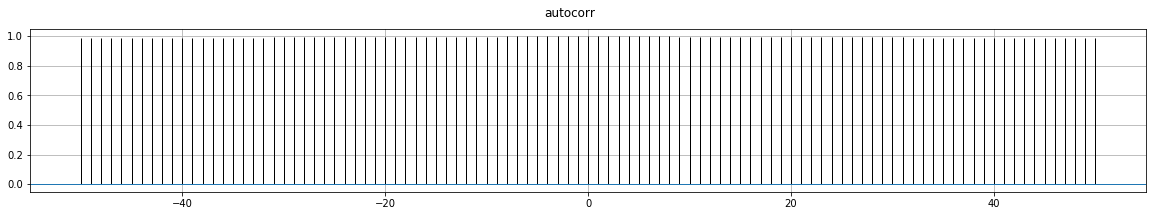

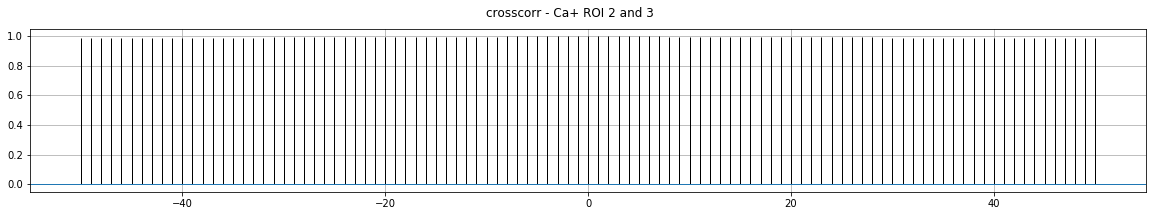

In [9]:
# AUTO-CORRELATION AND CROSS-CORRELATION OF Ca TRACES

plt.acorr(ca_avg, usevlines=True, normed=True, maxlags=50, lw=1)
plt.grid(True)
plt.suptitle('autocorr')
plt.show()


plt.xcorr(ca_avg, ca_avg_2, usevlines=True, normed=True, maxlags=50, lw=1)
plt.grid(True)
plt.suptitle('crosscorr - Ca+ ROI 2 and 3')
plt.show()